In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

import analysis
import dicom
from plot import plotVolumes

In [2]:
# two scan series with FSE @ 15.63 kHz RBW, 1.2mm iso
series_dirs = [
    '/bmrNAS/people/artoews/data/scans/230801/13295_dicom/Series6',
    '/bmrNAS/people/artoews/data/scans/230801/13295_dicom/Series17',
]
series_dirs_bw125 = [
    '/bmrNAS/people/artoews/data/scans/230817/13427_dicom/Series3',
    '/bmrNAS/people/artoews/data/scans/230817/13427_dicom/Series7',
    '/bmrNAS/people/artoews/data/scans/230817/13427_dicom/Series11',
    '/bmrNAS/people/artoews/data/scans/230817/13427_dicom/Series15'
]
series_dirs_bw31 = [
    '/bmrNAS/people/artoews/data/scans/230817/13427_dicom/Series4',
    '/bmrNAS/people/artoews/data/scans/230817/13427_dicom/Series8',
    '/bmrNAS/people/artoews/data/scans/230817/13427_dicom/Series12',
    '/bmrNAS/people/artoews/data/scans/230817/13427_dicom/Series16'
]

series_dirs = series_dirs_bw125
pla1_files = Path(series_dirs[0]).glob('*MRDC*')
pla2_files = Path(series_dirs[1]).glob('*MRDC*')
metal1_files = Path(series_dirs[2]).glob('*MRDC*')
metal2_files = Path(series_dirs[3]).glob('*MRDC*')
pla1 = dicom.load_series(pla1_files)
pla2 = dicom.load_series(pla2_files)
metal1 = dicom.load_series(metal1_files)
metal2 = dicom.load_series(metal2_files)

In [ ]:
# parameters
margin = 0.3
fs = 7
kernel = 'gaussian'

In [3]:
# masks
hypo_mask = analysis.mask_signal_void(metal1.data, reference_image=pla1.data, threshold=1-margin, filter_size=fs)
hyper_mask = analysis.mask_signal_void(-metal1.data, reference_image=-pla1.data, threshold=1+margin, filter_size=fs)

6.754452228546143
5.7154340744018555


In [4]:
# noise energy
noise_energy_pla = analysis.energy(pla1.data, pla2.data, kernel=kernel, size=fs)
noise_energy_metal = analysis.energy(metal1.data, metal2.data, kernel=kernel, size=fs)

In [5]:
# artifact energy
artifact_energy = analysis.energy(metal1.data, pla1.data, kernel=kernel, size=fs)

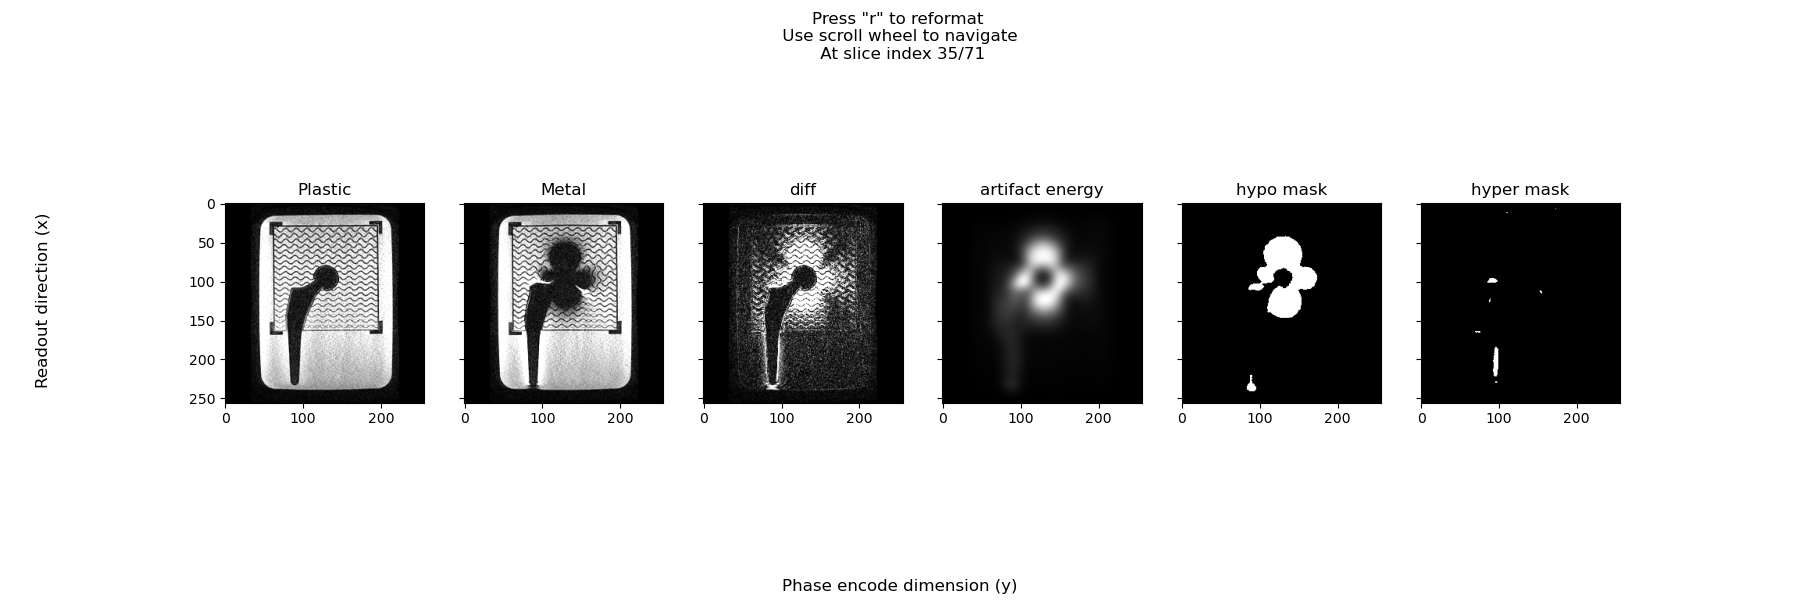

In [6]:
# plotting
%matplotlib widget
plastic = np.clip(pla1.data, 0, 2000)
metal = np.clip(metal1.data, 0, 2000)
diff = np.clip(np.abs(metal1.data - pla1.data), 0, 1000)
volumes = (plastic, metal, diff, artifact_energy, hypo_mask, hyper_mask)
plotVolumes(volumes, 1, 6, vmax=None, titles=('Plastic', 'Metal', 'diff', 'artifact energy', 'hypo mask', 'hyper mask'), figsize=(18, 6))